# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=True)

In [4]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
if orders.shape[1] == 13: 
    assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
else:  
    assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [5]:
orders.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,review_score,dim_is_five_star,dim_is_one_star,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,4,0,0,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,4,0,0,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,5,1,0,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,5,1,0,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,5,1,0,1,1,19.90,8.72


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96353 entries, 0 to 96360
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            96353 non-null  object 
 1   wait_time           96353 non-null  float64
 2   expected_wait_time  96353 non-null  float64
 3   delay_vs_expected   96353 non-null  float64
 4   order_status        96353 non-null  object 
 5   review_score        96353 non-null  int64  
 6   dim_is_five_star    96353 non-null  int64  
 7   dim_is_one_star     96353 non-null  int64  
 8   number_of_products  96353 non-null  int64  
 9   number_of_sellers   96353 non-null  int64  
 10  price               96353 non-null  float64
 11  freight_value       96353 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 9.6+ MB


In [7]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,review_score,dim_is_five_star,dim_is_one_star,number_of_products,number_of_sellers,price,freight_value
count,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000,96353.000000
mean,12.522869,23.741881,0.754903,4.155688,0.592187,0.097610,1.141687,1.013918,136.654623,22.757810
std,9.457183,8.759019,4.656481,1.284979,0.491431,0.296788,0.535362,0.123616,207.444085,21.496018
min,0.533414,2.008009,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.850000,0.000000
25%,6.763530,18.335243,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,45.900000,13.840000
50%,10.211944,23.233113,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000,86.000000,17.160000
75%,15.685278,28.411979,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000,149.900000,23.990000
max,208.351759,155.135463,188.975081,5.000000,1.000000,1.000000,21.000000,5.000000,13440.000000,1794.960000


📈 Plot histograms to get a sense of the distribution of each numerical feature.

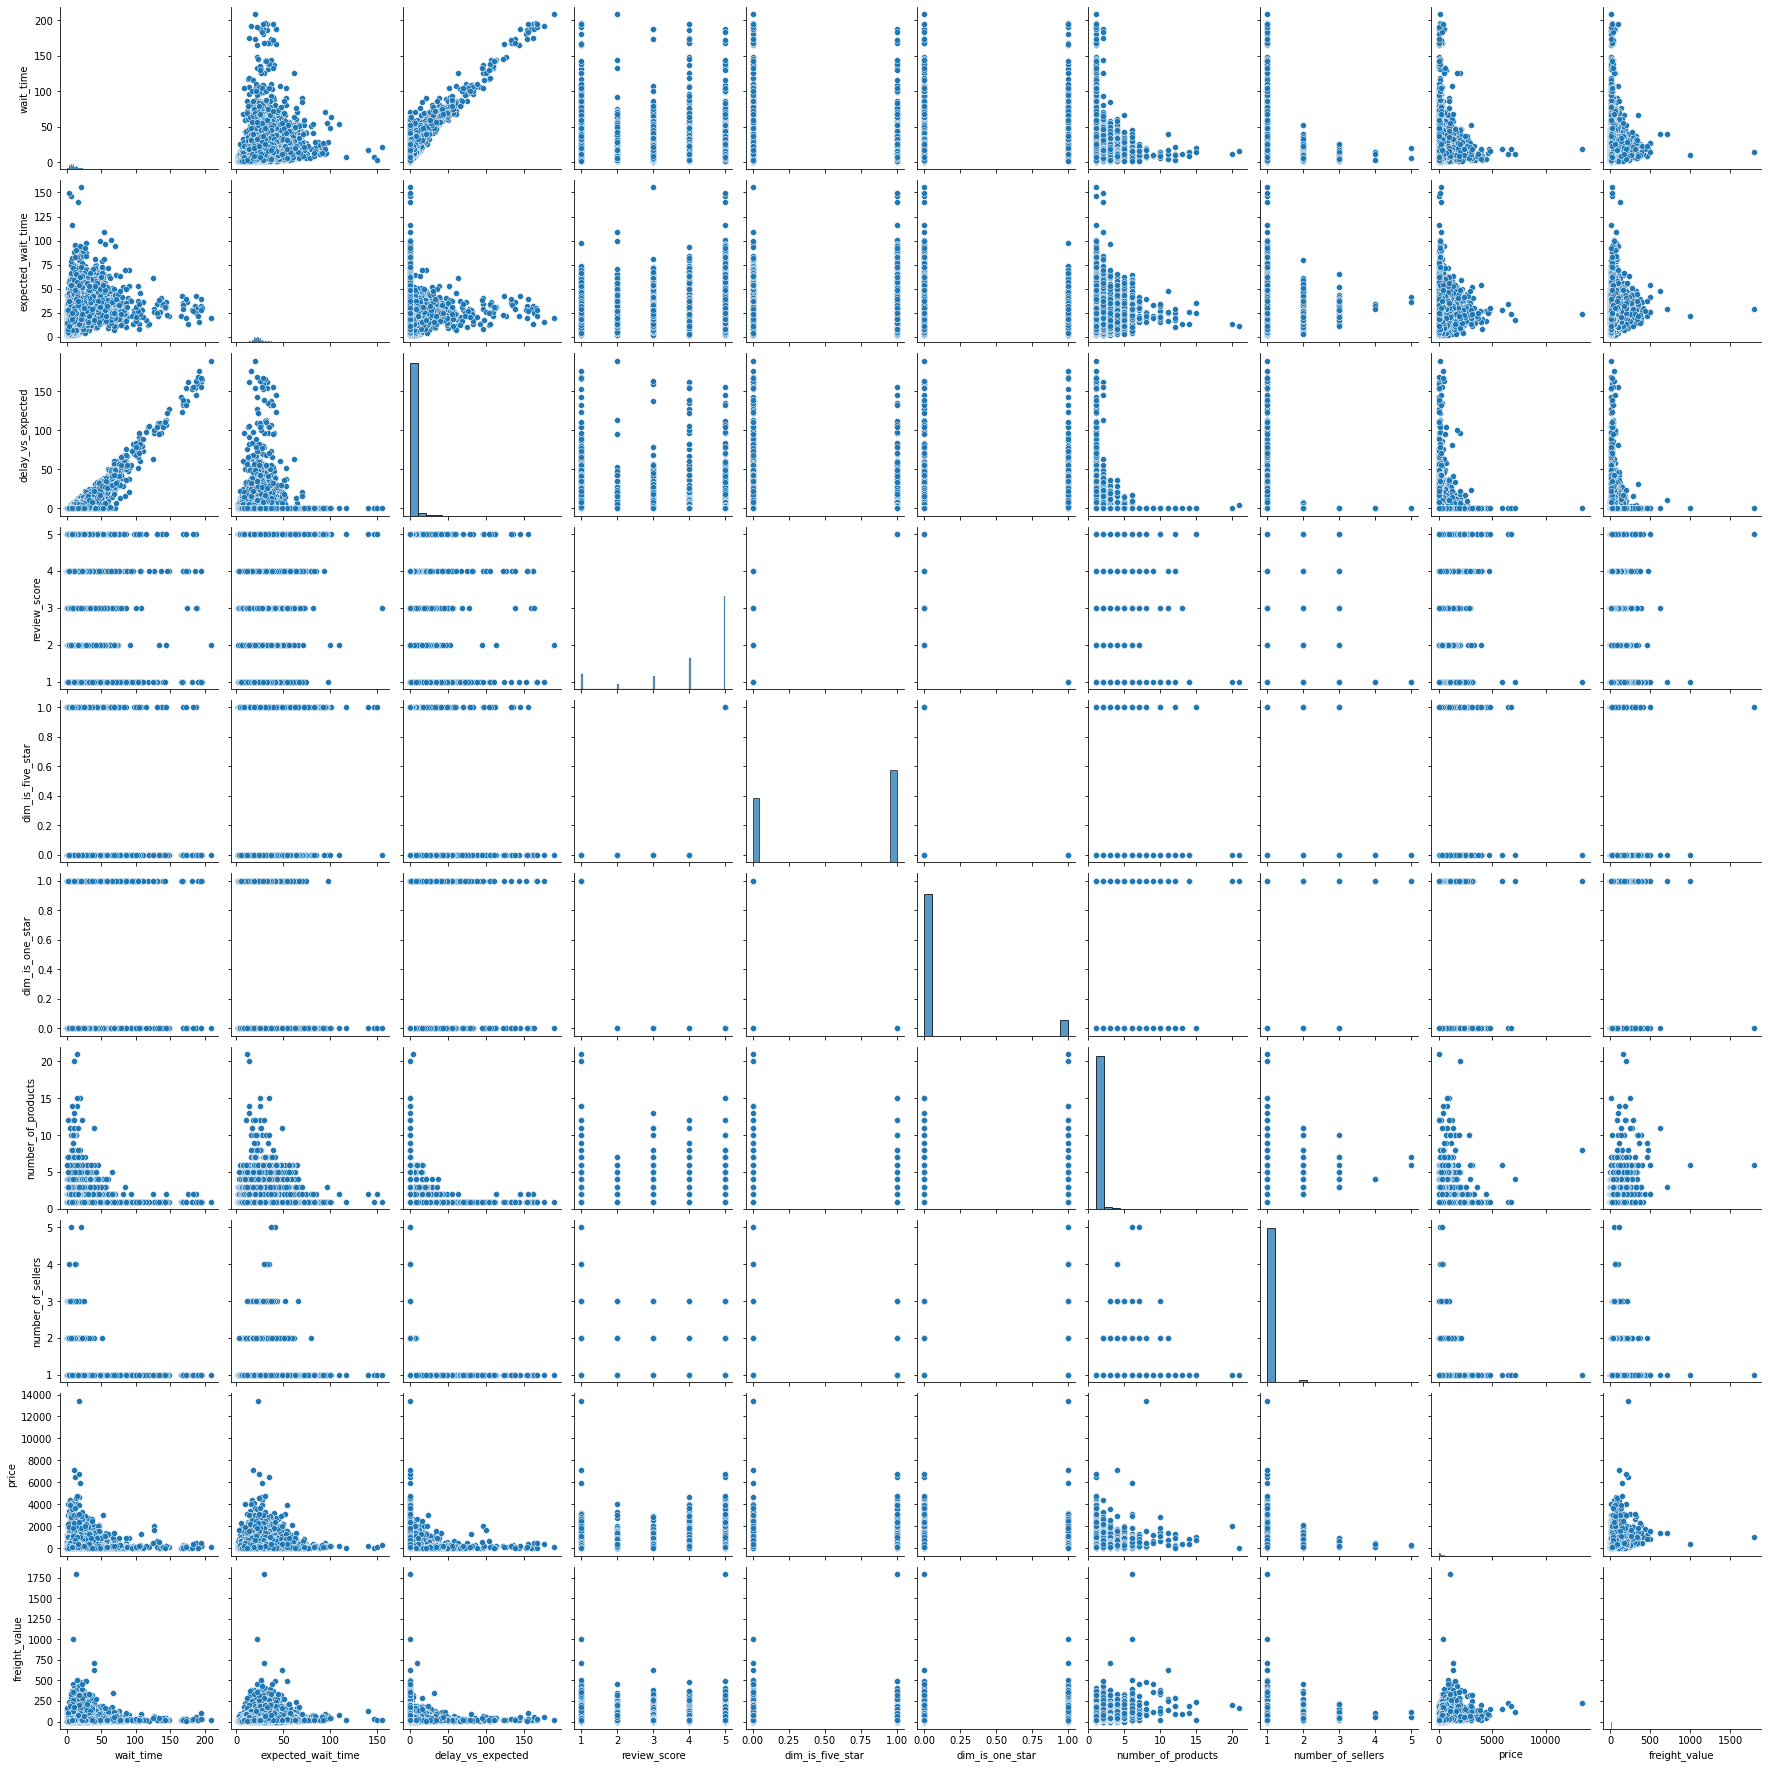

In [8]:
sns.pairplot(orders)

👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

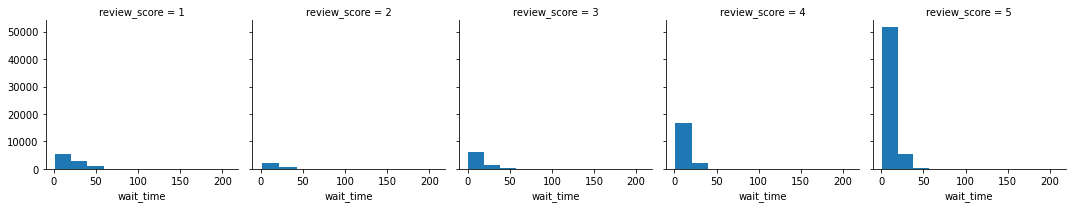

In [9]:
g = sns.FacetGrid(data=orders, col="review_score")
g.map(plt.hist, "wait_time")

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

<AxesSubplot:xlabel='price', ylabel='Density'>

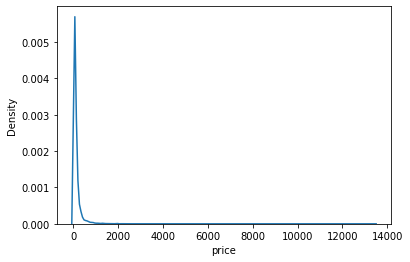

In [12]:
sns.kdeplot(orders['price'])

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

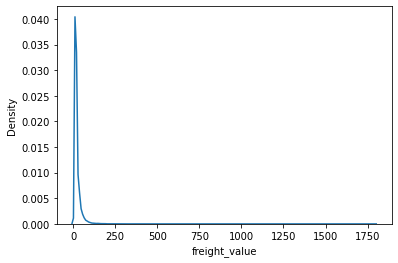

In [13]:
sns.kdeplot(orders['freight_value'])

<AxesSubplot:xlabel='distance_seller_customer', ylabel='Density'>

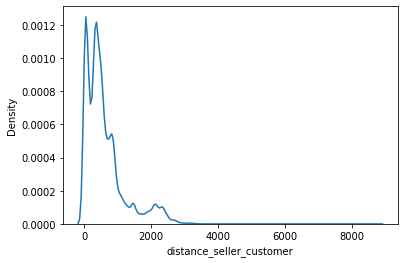

In [14]:
sns.kdeplot(orders['distance_seller_customer'])

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

<AxesSubplot:>

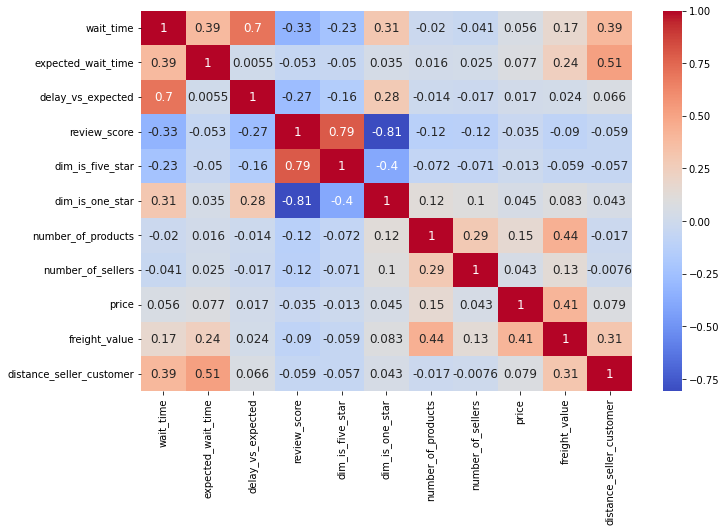

In [19]:
# Correlation plot 
plt.figure(figsize=(11,7))
sns.heatmap(orders.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 12})

In [20]:
round(np.abs(orders.corr()['review_score']).sort_values(ascending = False),2)

review_score                1.00
dim_is_one_star             0.81
dim_is_five_star            0.79
wait_time                   0.33
delay_vs_expected           0.27
number_of_products          0.12
number_of_sellers           0.12
freight_value               0.09
distance_seller_customer    0.06
expected_wait_time          0.05
price                       0.03
Name: review_score, dtype: float64

In [21]:
round(orders.corr()['review_score'],2)

wait_time                  -0.33
expected_wait_time         -0.05
delay_vs_expected          -0.27
review_score                1.00
dim_is_five_star            0.79
dim_is_one_star            -0.81
number_of_products         -0.12
number_of_sellers          -0.12
price                      -0.03
freight_value              -0.09
distance_seller_customer   -0.06
Name: review_score, dtype: float64

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

In [35]:
df_sample = orders[['review_score', 'wait_time', 'delay_vs_expected']].sample(10000, random_state=42)
df_sample

,review_score,wait_time,delay_vs_expected
24426,5,12.243912,0.0
68336,5,5.993692,0.0
40835,1,5.896574,0.0
36122,4,13.723866,0.0
6397,5,10.730706,0.0
...,...,...,...
69673,4,21.000567,0.0
15986,4,8.527292,0.0
65212,1,20.794502,0.0
21381,5,12.983877,0.0


(0.0, 6.0)

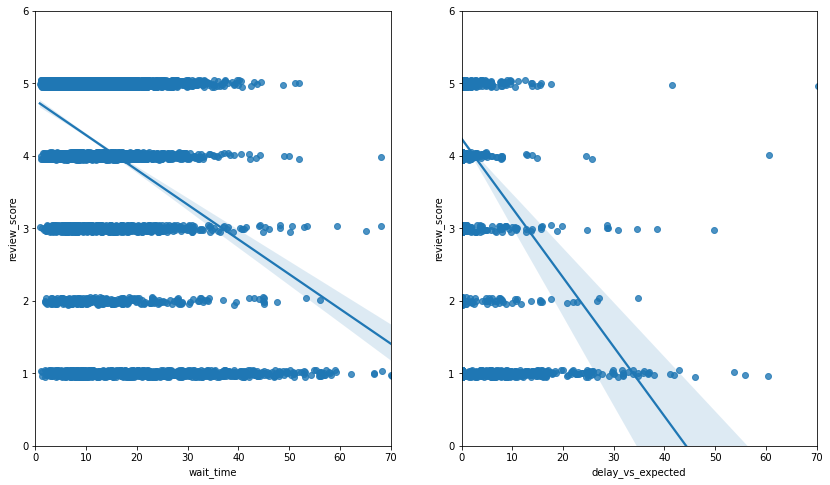

In [36]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.regplot(x='wait_time', y='review_score', data=df_sample, y_jitter=0.05)
plt.xlim(0,70)
plt.ylim(0,6)

plt.subplot(1,2,2)
sns.regplot(x='delay_vs_expected', y='review_score', data=df_sample, y_jitter=0.05)
plt.xlim(0,70)
plt.ylim(0,6)

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

For each 20 days of wait time the review score is decreased by one.
for each 10 days of delay x expected the review score is decreased by one.

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

(0.0, 6.0)

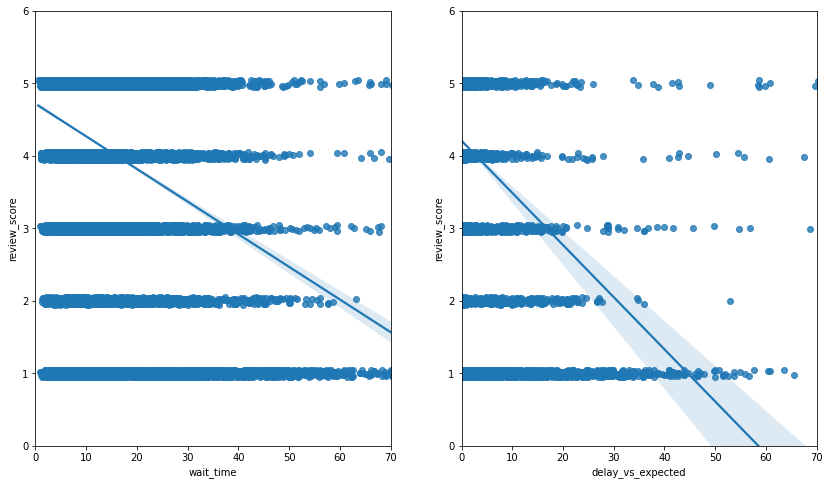

In [37]:
df_sample2 = orders[['review_score', 'wait_time', 'delay_vs_expected']].sample(50000, random_state=42)
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.regplot(x='wait_time', y='review_score', data=df_sample2, y_jitter=0.05)
plt.xlim(0,70)
plt.ylim(0,6)

plt.subplot(1,2,2)
sns.regplot(x='delay_vs_expected', y='review_score', data=df_sample2, y_jitter=0.05)
plt.xlim(0,70)
plt.ylim(0,6)

(0.0, 6.0)

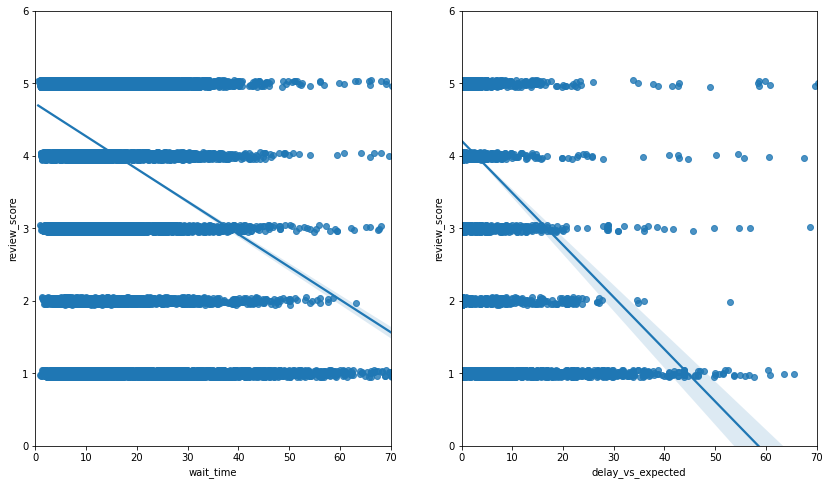

In [40]:
df_sample3 = orders[['review_score', 'wait_time', 'delay_vs_expected']].sample(50000, random_state=42)
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.regplot(x='wait_time', y='review_score', data=df_sample3, y_jitter=0.05, ci=70)
plt.xlim(0,70)
plt.ylim(0,6)

plt.subplot(1,2,2)
sns.regplot(x='delay_vs_expected', y='review_score', data=df_sample3, y_jitter=0.05, ci=70)
plt.xlim(0,70)
plt.ylim(0,6)

(0.0, 6.0)

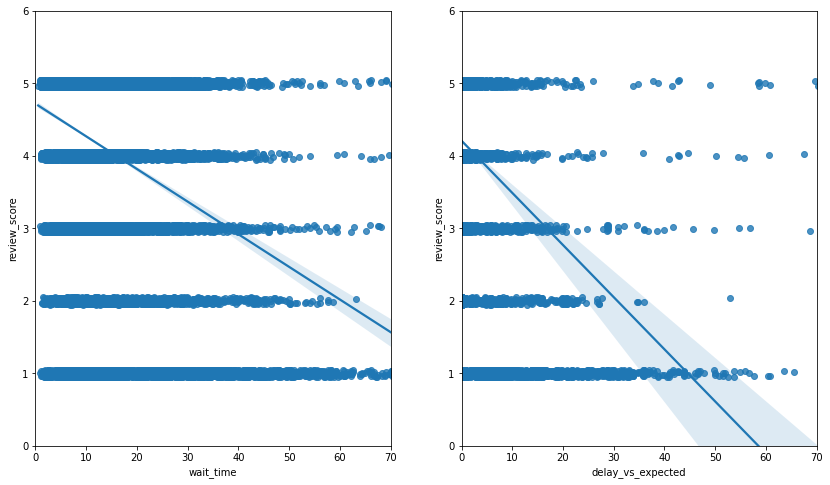

In [41]:
df_sample4 = orders[['review_score', 'wait_time', 'delay_vs_expected']].sample(50000, random_state=42)
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.regplot(x='wait_time', y='review_score', data=df_sample4, y_jitter=0.05, ci=99)
plt.xlim(0,70)
plt.ylim(0,6)

plt.subplot(1,2,2)
sns.regplot(x='delay_vs_expected', y='review_score', data=df_sample4, y_jitter=0.05, ci=99)
plt.xlim(0,70)
plt.ylim(0,6)

(0.0, 6.0)

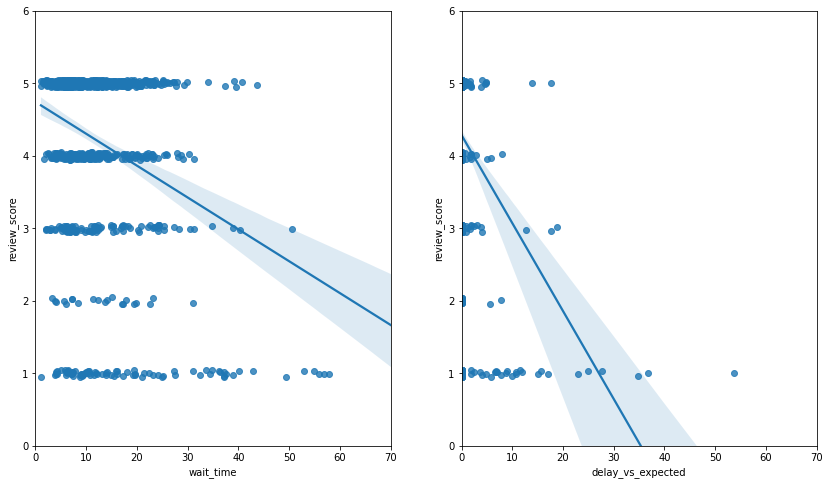

In [42]:
df_sample5 = orders[['review_score', 'wait_time', 'delay_vs_expected']].sample(1000, random_state=42)
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.regplot(x='wait_time', y='review_score', data=df_sample5, y_jitter=0.05)
plt.xlim(0,70)
plt.ylim(0,6)

plt.subplot(1,2,2)
sns.regplot(x='delay_vs_expected', y='review_score', data=df_sample5, y_jitter=0.05)
plt.xlim(0,70)
plt.ylim(0,6)

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the delivery time is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook